In [1]:
from matplotlib import pyplot as plt
import numpy as np
from keras.layers import *
from keras import models
import cv2
import os
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/home/rahil/anaconda3/envs/tenserflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rahil/anaconda3/envs/tenserflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rahil/anaconda3/envs/tenserflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rahil

In [2]:
#first reading the data
os.getcwd()

'/home/rahil/image-Segmentation'

In [3]:
os.chdir('/home/rahil/image-Segmentation/Datasets')

In [4]:
os.listdir()

['Skin_ValidY.npy',
 'best_model2.h5',
 'Skin_ValidX.npy',
 'Skin_TestX.npy',
 'Skin_TestY.npy',
 'best_model1.h5']

In [5]:
#reading x and y data
x=np.load('Skin_TestX.npy')
y=np.load('Skin_TestY.npy')

In [6]:
#reading the test_data
x_test=np.load('Skin_ValidX.npy')
y_test=np.load('Skin_ValidY.npy')

In [7]:
print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)

(600, 192, 256, 3)
(600, 192, 256)
(150, 192, 256, 3)
(150, 192, 256)


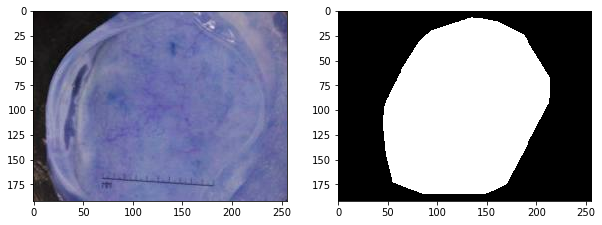

In [8]:
#visualizing the data
plt.figure(figsize=(10,10))
plt.subplot(221).imshow(x[0],'gray')
plt.subplot(222).imshow(y[0],'gray')
plt.show()

In [9]:
#preprocessing of data
#converting the data into first gray scale and then reducing dimensions
x_gray=[]
for i in range(0,len(x)):
    x_gray.append(cv2.cvtColor(x[i],cv2.COLOR_BGR2GRAY))
x=np.array(x_gray)
x_test_gray=[]
for i in range(0,len(x_test)):
    x_test_gray.append(cv2.cvtColor(x_test[i],cv2.COLOR_BGR2GRAY))
x_test=np.array(x_test_gray)

In [10]:
print(x.shape)
print(x_test.shape)
del x_gray
del x_test_gray

(600, 192, 256)
(150, 192, 256)


In [11]:
#resizing of the array into size of 128, 128 using cv2
x_resize=[]
for i in range(0,len(x)):
    x_resize.append(cv2.resize(x[i],(128,128)))
print(len(x_resize))
x_tresize=[]
for i in range(0,len(x_test)):
    x_tresize.append(cv2.resize(x_test[i],(128,128)))
print(len(x_tresize))

600
150


In [12]:
x=np.array(x_resize)
print(x.shape)
x_test=np.array(x_tresize)
print(x_test.shape)

(600, 128, 128)
(150, 128, 128)


In [13]:
#now converting each element into 3 dimension
x=x.reshape(-1,128,128,1)
print(x.shape)
x_test=x_test.reshape(-1,128,128,1)
print(x_test.shape)

(600, 128, 128, 1)
(150, 128, 128, 1)


In [14]:
#now performing the same operations for the y data
y_resize=[]
y_tresize=[]
for i in range(0,len(y)):
    y_resize.append(cv2.resize(y[i],(128,128)))
len(y_resize)
y=np.array(y_resize)
print(y.shape)
y=y.reshape(-1,128,128,1)
print(y.shape)

for i in range(0,len(y_test)):
    y_tresize.append(cv2.resize(y_test[i],(128,128)))
len(y_tresize)
y_test=np.array(y_tresize)
print(y_test.shape)
y_test=y_test.reshape(-1,128,128,1)
print(y_test.shape)

del y_resize
del y_tresize
del x_resize
del x_tresize

(600, 128, 128)
(600, 128, 128, 1)
(150, 128, 128)
(150, 128, 128, 1)


In [15]:
#finally after performing the all transformation
print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)

(600, 128, 128, 1)
(600, 128, 128, 1)
(150, 128, 128, 1)
(150, 128, 128, 1)


In [16]:
#performing the normalization of taking each value between 0 and 1
x=x.astype('float32')/255
y=y.astype('float32')/255
x_test=x_test.astype('float32')/255
y_test=y_test.astype('float32')/255

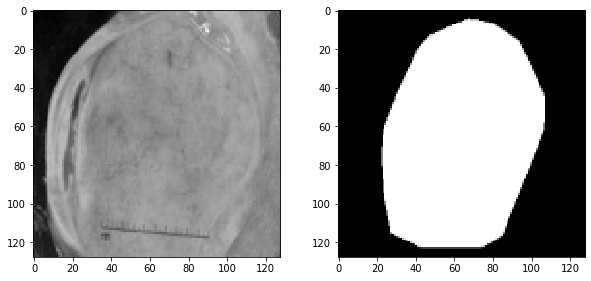

In [17]:
#visualization after perfroming some perprossing
#visualizing the data
plt.figure(figsize=(10,10))
plt.subplot(221).imshow(x[0].reshape(128,128),'gray')
plt.subplot(222).imshow(y[0].reshape(128,128),'gray')
plt.show()

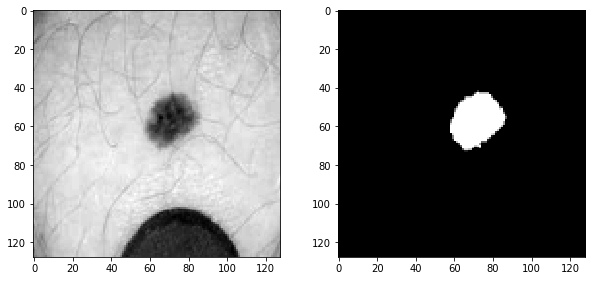

In [18]:
#visualization test_data after perfroming some perprossing
#visualizing the data
plt.figure(figsize=(10,10))
plt.subplot(221).imshow(x_test[0].reshape(128,128),'gray')
plt.subplot(222).imshow(y_test[0].reshape(128,128),'gray')
plt.show()

In [19]:
#normalizing the training data
x_mean=np.mean(x)
x_std=np.std(x)
x=x-x_mean
x=x/x_std
#normalizing the testing data 
x_test=x_test-x_mean
x_test=x_test/x_std

In [20]:
#creating the model
model=models.Sequential()
model.add( Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same',input_shape=(128,128,1)))
model.add( MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Dropout(0.5))
model.add(Conv2DTranspose(filters=1,kernel_size=(2,2),strides=(2,2),activation='sigmoid'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 128, 128, 1)       129       
Total params: 14,177
T

In [21]:
#creating the callbacks and checkpoints to save best model
from keras.callbacks import EarlyStopping,ModelCheckpoint
es=EarlyStopping(monitor="val_loss",mode='min',patience=10 ,verbose=1)
cp=ModelCheckpoint('best_model2.h5',monitor="val_loss",mode='min',verbose=1,save_best_only='true')

In [22]:
#compiling the model
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [23]:
#fitting the model
history=model.fit(x,y,batch_size=32,epochs=50,validation_split=0.2,callbacks=[es,cp],verbose=1,shuffle='true',class_weight='auto')


Train on 480 samples, validate on 120 samples
Epoch 1/50
480/480 [==============================] - 10s 21ms/step - loss: 0.2324 - acc: 0.6347 - val_loss: 0.2272 - val_acc: 0.6254

Epoch 00001: val_loss improved from inf to 0.22719, saving model to best_model2.h5
Epoch 2/50
480/480 [==============================] - 8s 16ms/step - loss: 0.1784 - acc: 0.7296 - val_loss: 0.1903 - val_acc: 0.7381

Epoch 00002: val_loss improved from 0.22719 to 0.19025, saving model to best_model2.h5
Epoch 3/50
480/480 [==============================] - 7s 15ms/step - loss: 0.1536 - acc: 0.7791 - val_loss: 0.1799 - val_acc: 0.7521

Epoch 00003: val_loss improved from 0.19025 to 0.17993, saving model to best_model2.h5
Epoch 4/50
480/480 [==============================] - 7s 16ms/step - loss: 0.1471 - acc: 0.7942 - val_loss: 0.1607 - val_acc: 0.8291

Epoch 00004: val_loss improved from 0.17993 to 0.16074, saving model to best_model2.h5
Epoch 5/50
480/480 [==============================] - 7s 16ms/step - los

In [24]:
#Evaluation of model
model.evaluate(x_test,y_test)

150/150 [==============================] - 1s 3ms/step


[0.10194008400042852, 0.8639721663792929]

In [25]:
#evaluation of best model
best_model=models.load_model('best_model2.h5')
best_model.evaluate(x_test,y_test)

150/150 [==============================] - 1s 3ms/step


[0.10308061569929122, 0.8597863753636678]

In [26]:
#plotting graph of loss
loss=history.history['loss']
acc=history.history['acc']
val_loss=history.history['val_loss']
val_acc=history.history['val_acc']
epoch=range(0,len(loss))

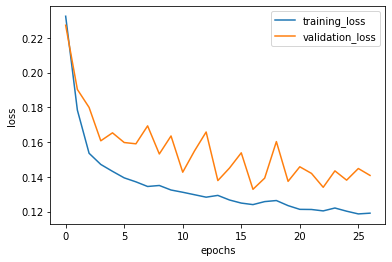

In [27]:
plt.plot(epoch,loss)
plt.plot(epoch,val_loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training_loss','validation_loss'])

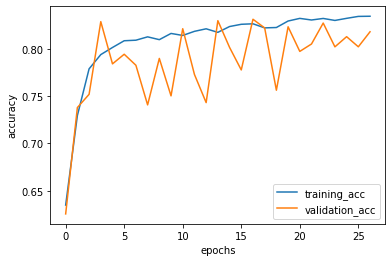

In [28]:
#plotting the graph for accuracy
plt.plot(epoch,acc)
plt.plot(epoch,val_acc)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training_acc','validation_acc'])

In [29]:
#predictions
y_predict=model.predict(x_test[0].reshape(1,128,128,1))
y_predict.shape

(1, 128, 128, 1)

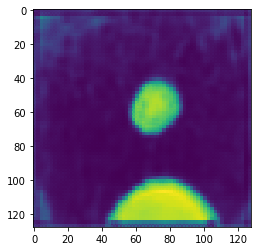

In [30]:
plt.imshow(y_predict.reshape(128,128))

Text(0.5, 0, 'output produced')

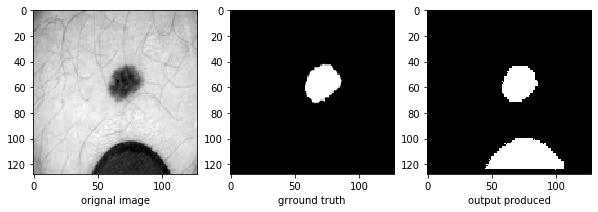

In [31]:
#performing thresholdig
y_final=y_predict >0.5
#finally the images
plt.figure(figsize=(10,10))
plt.subplot(131).imshow(x_test[0].reshape(128,128),'gray')
plt.xlabel('orignal image')
plt.subplot(132).imshow(y_test[0].reshape(128,128),'gray')
plt.xlabel('grround truth')
plt.subplot(133).imshow(y_final.reshape(128,128),'gray')
plt.xlabel('output produced')